Load the `ISLR2` and `tidymodels` packages.

In [2]:
library('tidymodels')
library('ISLR2')



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.1     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



Take a look at the `Smarket` dataset which comes from the ISLR2 package (also described in [the book](https://www.statlearning.com/)). 

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 


Down   Up 
 602  648 

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
7,2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
8,2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
9,2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up


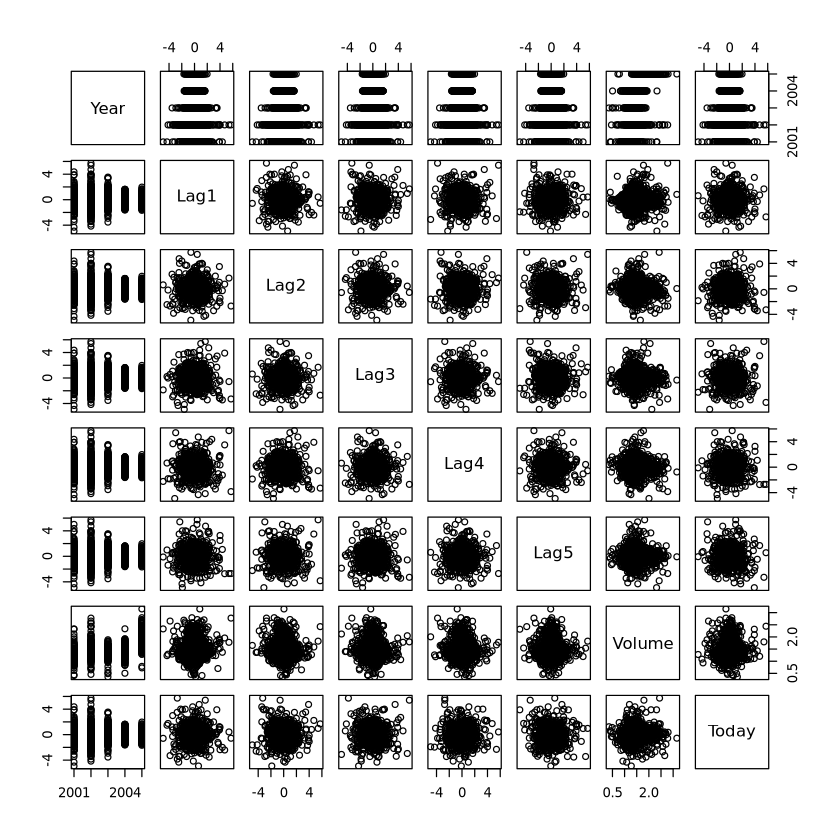

In [4]:
data("Smarket")                 # or just use ISLR2::Smarket
Smarket <- ISLR2::Smarket

str(Smarket)                    # structure
summary(Smarket)                # summary stats
table(Smarket$Direction)        # class balance (Up/Down)
pairs(Smarket[, -9])            # scatterplot matrix (drop factor col)
cor(Smarket[, -c(9)])           # correlations of numeric columns
head(Smarket, 10)

Let's see if we can predict when the market will be "Up" or "Down" (see the "Direction" variable of `Smarket`). We use the following variables as predictors:

- Lag1: *percentage returns from previous before*
- Volume: *the number of shares traded on the previous day, in billions*

First we need to split our data into training and test subsets. 

Plot the number of observations per year using a bar chart.

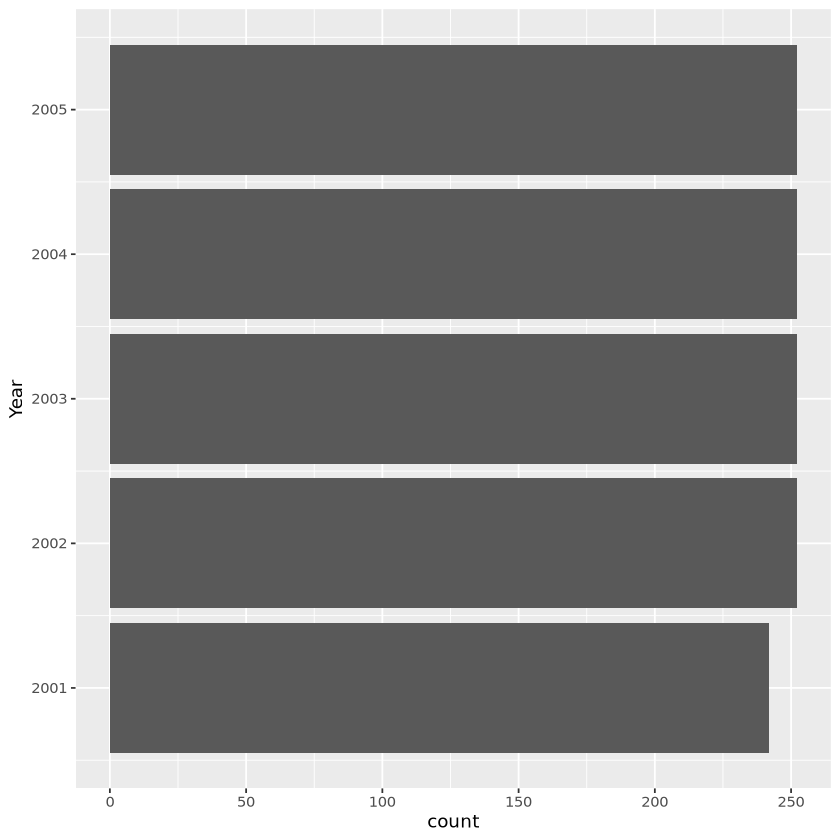

In [15]:
ggplot(Smarket, aes(y= Year)) + geom_bar()



Run the following cell after substituting `PUT_MOST_RECENT_YEAR_HERE` with a value deduced from the chart above. Why is this a sensible way to split our data?

In [16]:
Smarket_train = Smarket |> filter(Year < 2005)

Smarket_test = Smarket |> filter(Year == 2005)

Generate a model to predict market direction.
- Use the `logistic_reg()` function from `tidymodels` and the "glm" engine.
- Use the training data from above and call your fitted model `mod_fit`.
- Use `Direction ~ Volume + Lag1` as the formula.

In [30]:

mod = logistic_reg() |> set_engine('glm')


mod_fit = mod |> fit(Direction ~ Volume + Lag1, Smarket_train)
mod_fit


parsnip model object


Call:  stats::glm(formula = Direction ~ Volume + Lag1, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)       Volume         Lag1  
    0.17896     -0.10737     -0.05333  

Degrees of Freedom: 997 Total (i.e. Null);  995 Residual
Null Deviance:	    1383 
Residual Deviance: 1382 	AIC: 1388

Run the following code to predict from your test data and generate a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). When the market is "Up" how often does your model predict the same?

In [35]:
augment(mod_fit, Smarket_test) |>

    conf_mat(Direction, .pred_class)

          Truth
Prediction Down Up
      Down   84 95
      Up     27 46

Run the following code to calculate the error rate for the model.

In [37]:
augment(mod_fit, Smarket_test) |>
    summarize(error_rate = mean(Direction != .pred_class))
#summarize(n_correct = sum(.pred_class == Direction)/ n())
# n returns today number of rows

error_rate
<dbl>
0.484127


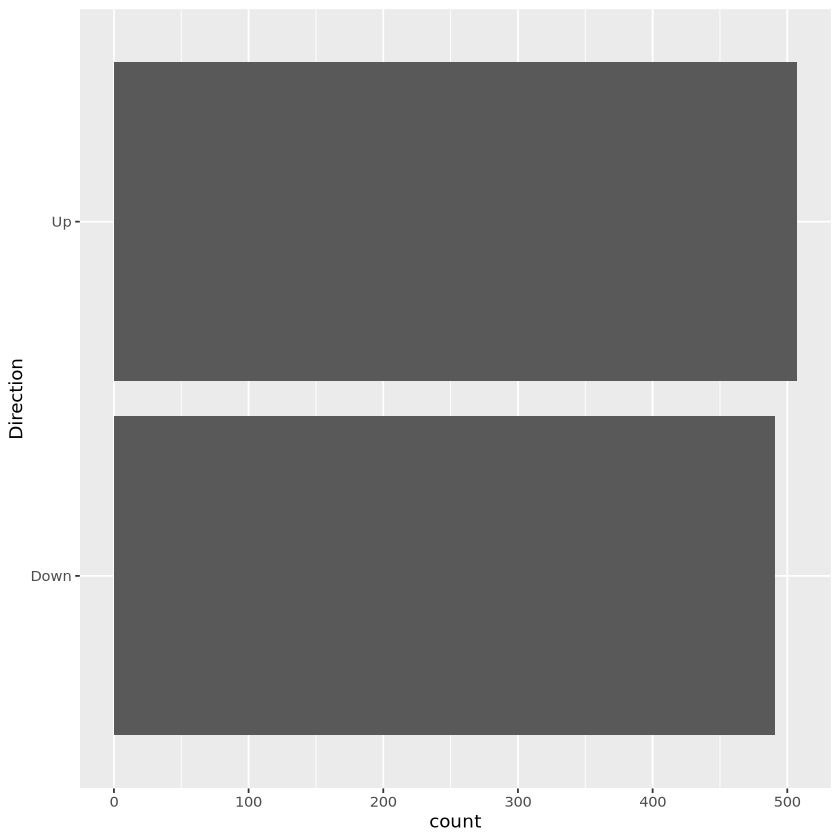

In [36]:
ggplot(Smarket_train, aes(y = Direction)) + geom_bar()

Run the following code to calculate the error rate for a simple model that always predicts "Up". Is the error rate better than your logistic regression model?

In [20]:
Smarket_test |>
    summarise(error_rate = mean(Direction != "Up"))
#this is a model that predicts the stock will always go up

error_rate
<dbl>
0.4404762
